# Fully-Connected Layers Tutorial on Fashion MNIST Data Set 

This is a naive tutorial on how to use `FCLayer` (Fully-connected Layer) to train and predict the Fashion MNIST data set

### First Let's load the Packages

In [1]:
using MLDatasets
using NumNN
using Plots
gr()

Plots.GRBackend()

### Temp for ProgressMeter.jl Package

In [2]:
### uncomment this line the first time you run this code
# ] add https://github.com/timholy/ProgressMeter.jl.git ;

In [3]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear);

### Load the Train/Test Data/Labels

In [4]:
X_train, Y_train = FashionMNIST.traindata(Float32);
X_test, Y_test = FashionMNIST.testdata(Float32);

### Let's Prepare The Data/Labels

In [5]:
X_train ./= 255
X_train = reshape(X_train, (28*28,60000))
X_test ./=255
X_test = reshape(X_test, (28*28, 10000))
Y_train = oneHot(Y_train)
Y_test = oneHot(Y_test);

### It's Time fot The Layers 

In [6]:
X_Input = Input(X_train) #or Input(size(X_train))
# X = Flatten()(X_Input)
X = FCLayer(120, :relu)(X_Input)
X_Output = FCLayer(10, :softmax)(X);

Another way when there is no side branches is to use the `chain` function as follows:

```julia
X_Input, X_Ouput = chain(X_train,[Flatten(),FCLayer(120,:relu),FCLayer(10,:softmax)]);
```

`chain` returns a `Tuple` of two pointers of the Input `Layer` and Output `Layer`

### Define the Model 

This will also initialize the `Layer`s' parameters

In [7]:
model = Model(X_train,Y_train,X_Input,X_Output, Float32(0.01); optimizer=:adam, paramsDtype=Float32);

#### Let's use `predict` to see the current Accuracy

In [8]:
TestP = predict(model, X_test, Y_test);

println()
println("The accuracy of Test Data before the training process $(round(TestP[:accuracy], digits=4))")
println("The cost of Test Data before the training process $(round(TestP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
  Instances 10000:  10000



The accuracy of Test Data before the training process 0.0851
The cost of Test Data before the training process 2.3029


In [9]:
TrainP = predict(model, X_train, Y_train);

println()
println("The accuracy of Train Data before the training process $(round(TrainP[:accuracy], digits=4))")
println("The cost of Train Data before the training process $(round(TrainP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  Instances 60000:  60000



The accuracy of Train Data before the training process 0.0885
The cost of Train Data before the training process 2.3029


## Train the model

In [10]:
TrainD = train(X_train, Y_train, model, 10);# testData = X_test, testLabels = Y_test);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:51
  Epoch 10:         10
  Instances 60000:  60000
  Train Cost:       0.3074
  Train Accuracy:   0.8869


`train` function provides an extra `kwargs` to use test Data/Labels to get the Costs and Accuracies during each training epochs. 

**Note** This will take extra time to do the training

Instead it can be used as follows:

```julia
TrainD = train(X_train, Y_train, model, 10)
```

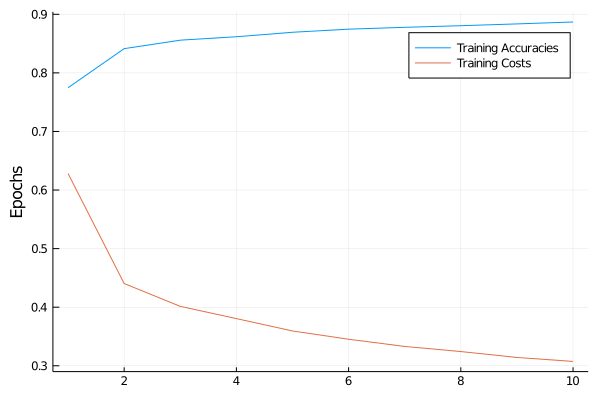

In [11]:
plot(1:10, TrainD[:trainAccuracies], label="Training Accuracies")
plot!(1:10, TrainD[:trainCosts], label="Training Costs")
# plot!(1:10, TrainD[:testAccuracies], label="Test Accuracies")
# plot!(1:10, TrainD[:testCosts], label="Test Costs")
ylabel!("Epochs")

### Predict After Training

In [12]:
TrainP = predict(model, X_train, Y_train);

println()
println("The accuracy of Train Data before the training process $(round(TrainP[:accuracy], digits=4))")
println("The cost of Train Data before the training process $(round(TrainP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  Instances 60000:  60000



The accuracy of Train Data before the training process 0.8902
The cost of Train Data before the training process 0.3


In [13]:
TestP = predict(model, X_test, Y_test);

println()
println("The accuracy of Test Data before the training process $(round(TestP[:accuracy], digits=4))")
println("The cost of Test Data before the training process $(round(TestP[:cost], digits=4))")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  Instances 10000:  10000



The accuracy of Test Data before the training process 0.865
The cost of Test Data before the training process 0.3728
